# References pipeline
The main scope of this pipeline is:
- Filter useful CVE, based on the validation status
- Extract the references list from them
- Data analysis and selection of the repos under investigation 

In [3]:
import os

os.chdir("..")
os.getcwd()

'/home/edvinn/KTH/DA231X-ex/Thesis-Edvin'

In [1]:
import pandas as pd
from datasets import load_dataset

ds = load_dataset("Eathus/nvd_raw_list", split="train")
raw_df = ds.to_pandas()

In [2]:
import pandas as pd
from datasets import load_dataset

ds = load_dataset("Eathus/cwe_view1000_raw_list", split="train")
cwe_1000_df = ds.to_pandas()
ds = load_dataset("Eathus/cwe_view1003_raw_list", split="train")
cwe_1003_df = ds.to_pandas()

In [3]:
raw_df["vulnStatus"].value_counts()

vulnStatus
Modified               118041
Awaiting Analysis       22514
Analyzed                15110
Rejected                 8816
Received                 1259
Undergoing Analysis       777
Name: count, dtype: int64

| NVD Status         | Description                                                                                                    |
|--------------------|----------------------------------------------------------------------------------------------------------------|
| Received           | CVE has been recently published to the CVE List and has been received by the NVD.                              |
| Awaiting Analysis  | CVE has been marked for Analysis. Normally once in this state the CVE will be analyzed by NVD staff within 24 hours. |
| Undergoing Analysis| CVE is currently being analyzed by NVD staff, this process results in association of reference link tags, CVSS metrics, CWE association, and CPE applicability statements. |
| Analyzed           | CVE has had analysis completed and all data associations made. Each Analysis has three sub-types, Initial, Modified and Reanalysis. Analyzed CVEs do not show a banner on the vulnerability detail page. |
| Initial            | Used to show the first time analysis was performed on a given CVE.                                              |
| Modified           | Used to show that analysis was performed due to a modification of the CVE’s information.                        |
| Reanalysis         | Used to show that new analysis occurred, but was not due to a modification from an external source.             |
| Modified           | CVE has been amended by a source (CVE Primary CNA or another CNA). Analysis data supplied by the NVD may no longer be accurate due to these changes. |
| Deferred           | When a CVE is given this status the NVD does not plan to analyze or re-analyze this CVE due to resource or other concerns. |
| Rejected           | CVE has been marked as "**REJECT**" in the CVE List. These CVEs are stored in the NVD, but do not show up in search results. |


In [4]:
filtered_df = raw_df[
    raw_df["vulnStatus"].str.contains("Analyzed|Modified", na=False)
].copy()
filtered_df["vulnStatus"].value_counts()

vulnStatus
Modified    118041
Analyzed     15110
Name: count, dtype: int64

In [5]:
filtered_df["descriptions"] = filtered_df["descriptions"].map(lambda x: x[0]["value"])
filtered_df["cvssData"] = filtered_df["metrics"].map(
    lambda x: x["cvssMetricV31"] if "cvssMetricV31" in x.keys() else None
)
vulnerabilities_df = filtered_df[
    [
        "id",
        "published",
        "descriptions",
        "metrics",
        "weaknesses",
        "references",
        "configurations",
    ]
]
display(vulnerabilities_df)
display(vulnerabilities_df["weaknesses"].iloc[0])

,id,published,descriptions,metrics,weaknesses,references,configurations
0,CVE-2019-3494,2019-01-01T15:29:00.240,Simply-Blog through 2019-01-01 has SQL Injecti...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Exploit...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
1,CVE-2018-20650,2019-01-01T16:29:00.233,A reachable Object::dictLookup assertion in Po...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Third P...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
2,CVE-2018-20651,2019-01-01T16:29:00.343,A NULL pointer dereference was discovered in e...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': None, 'ur...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
3,CVE-2018-20652,2019-01-01T16:29:00.403,An attempted excessive memory allocation was d...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Exploit...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
4,CVE-2019-3500,2019-01-02T07:29:00.197,"aria2c in aria2 1.33.1, when --log is used, ca...","{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Patch',...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
...,...,...,...,...,...,...,...
165230,CVE-2025-25192,2025-02-25T18:15:27.583,GLPI is a free asset and IT management softwar...,"{'cvssMetricV2': None, 'cvssMetricV30': None, ...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'security-advisories@github.com', ...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
165231,CVE-2024-36259,2025-02-25T19:15:14.343,Improper access control in mail module of Odoo...,"{'cvssMetricV2': None, 'cvssMetricV30': None, ...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'security@odoo.com', 'tags': ['Exp...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
165239,CVE-2025-27110,2025-02-25T20:15:37.517,Libmodsecurity is one component of the ModSecu...,"{'cvssMetricV2': None, 'cvssMetricV30': None, ...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'security-advisories@github.com', ...",[{'nodes': [{'cpeMatch': array([{'criteria': '...
165240,CVE-2025-27139,2025-02-25T20:15:37.693,Combodo iTop is a web based IT service managem...,"{'cvssMetricV2': None, 'cvssMetricV30': None, ...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'security-advisories@github.com', ...",[{'nodes': [{'cpeMatch': array([{'criteria': '...


array([{'description': array([{'lang': 'en', 'value': 'CWE-89'}], dtype=object), 'source': 'nvd@nist.gov', 'type': 'Primary'}],
      dtype=object)

In [34]:
"""
df_cve_weaknesses = vulnerabilities_df[["id", "weaknesses"]].copy()
# display(df_cve_weaknesses.drop_duplicates(subset="id"))
df_cve_weaknesses_expanded = df_cve_weaknesses.explode("weaknesses")
display(df_cve_weaknesses_expanded)
df_weaknesses_normalized = pd.json_normalize(df_cve_weaknesses_expanded["weaknesses"])

# Combine the normalized weaknesses with the original id column
df_cve_wd = pd.concat(
    [df_cve_weaknesses_expanded["id"].reset_index(drop=True), df_weaknesses_normalized],
    axis=1,
)
df_cve_wd_exp = df_cve_wd.explode("description")
df_cve_wd_norm = pd.json_normalize(df_cve_wd_exp["description"])
df_cve_weak_final = pd.concat(
    [df_cve_wd_exp[["id", "source", "type"]].reset_index(drop=True), df_cve_wd_norm],
    axis=1,
)

df_cve_weak_final = df_cve_weak_final[
    df_cve_weak_final["value"].astype(str).str.contains("CWE\\-[0-9]+", regex=True)
].reset_index(drop=True)
# Display the final DataFrame
display(df_cve_wd_exp)
display(df_cve_weak_final)
print(len(df_cve_weak_final.drop_duplicates(subset="id")))
# display(pd.DataFrame(weaknesses_list_tmp))'
"""

'\ndf_cve_weaknesses = vulnerabilities_df[["id", "weaknesses"]].copy()\n# display(df_cve_weaknesses.drop_duplicates(subset="id"))\ndf_cve_weaknesses_expanded = df_cve_weaknesses.explode("weaknesses")\ndisplay(df_cve_weaknesses_expanded)\ndf_weaknesses_normalized = pd.json_normalize(df_cve_weaknesses_expanded["weaknesses"])\n\n# Combine the normalized weaknesses with the original id column\ndf_cve_wd = pd.concat(\n    [df_cve_weaknesses_expanded["id"].reset_index(drop=True), df_weaknesses_normalized],\n    axis=1,\n)\ndf_cve_wd_exp = df_cve_wd.explode("description")\ndf_cve_wd_norm = pd.json_normalize(df_cve_wd_exp["description"])\ndf_cve_weak_final = pd.concat(\n    [df_cve_wd_exp[["id", "source", "type"]].reset_index(drop=True), df_cve_wd_norm],\n    axis=1,\n)\n\ndf_cve_weak_final = df_cve_weak_final[\n    df_cve_weak_final["value"].astype(str).str.contains("CWE\\-[0-9]+", regex=True)\n].reset_index(drop=True)\n# Display the final DataFrame\ndisplay(df_cve_wd_exp)\ndisplay(df_cve_wea

In [8]:
display(
    *vulnerabilities_df[
        vulnerabilities_df["weaknesses"].apply(
            lambda x: all([y["type"] == "Secondary" for y in x])
        )
    ]["weaknesses"].head()
)

TypeError: 'NoneType' object is not iterable

In [9]:
def filter_cwe(nvd_df, cwe_df, primary_only=False, collect_stats=False):
    df = nvd_df.copy()
    stats = pd.DataFrame()
    stats["nvd_count"] = [len(df)] if collect_stats else [None]
    df = df.dropna(subset="weaknesses")
    stats["weaknesses_count"] = [len(df)] if collect_stats else [None]
    df["weaknesses"] = df["weaknesses"].apply(
        lambda x: [
            y
            for y in x
            if all(
                [
                    z["value"] != "NVD-CWE-Other" and z["value"] != "NVD-CWE-noinfo"
                    for z in y["description"]
                ]
            )
            and ((y["type"] == "Primary") if primary_only else True)
        ]
    )
    stats["assigned_weaknesses_count"] = (
        [len(df[df["weaknesses"].apply(len) > 0])] if collect_stats else [None]
    )
    if not primary_only:
        df["weaknesses"] = df["weaknesses"].apply(
            lambda x: (
                [y for y in x if y["type"] == "Primary"]  # Keep only 'Primary'
                if any(y["type"] == "Primary" for y in x)
                else x
            )
        )
    df["weaknesses"] = df["weaknesses"].apply(
        lambda x: (
            [y for y in x if y["source"] == "nvd@nist.gov"]  # Keep only 'Primary'
            if any(
                y["source"] == "nvd@nist.gov" for y in x
            )  # Check if at least one 'Primary' exists
            else x
        )
    )
    df["weaknesses"] = df["weaknesses"].apply(
        lambda x: (
            [x[0]]
            if len(set([str([z["value"] for z in y["description"]]) for y in x])) == 1
            else []
        )
    )
    """
    print(*df[df["weaknesses"].apply(lambda x: (
            any([
                not y["value"][4:] in cwe_df['ID'].values
                for y in x[0]["description"] 
            ]) if x != [] else False
        ))
        ]['weaknesses'].head()
    )
    """
    usage_dict = pd.Series(cwe_df.MappingNotes_Usage.values, index=cwe_df.ID).to_dict()
    df["cwe_list"] = df["weaknesses"].map(
        lambda x: (
            [
                y["value"][4:]
                for y in x[0]["description"]
                if y["value"][4:] in usage_dict
                and usage_dict[y["value"][4:]] != "Prohibited"
            ]
            if x != []
            else []
        )
    )
    df = df[df["cwe_list"].apply(len) > 0].reset_index(drop=True)
    stats["filtered_weaknesses_count"] = (
        [len(df["cwe_list"])] if collect_stats else [None]
    )
    df["primary_cwe"] = df["cwe_list"].map(lambda x: x[0] if len(x) == 1 else None)
    stats["single_cwe_weaknesses_count"] = (
        [len(df[df["primary_cwe"].notna()])]
        if collect_stats
        else [None]
    )
    # df = df[]
    return df, stats

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(vulnerabilities_df)
df, filter_cwe_stats = filter_cwe(df, cwe_1000_df, collect_stats=True)
display(filter_cwe_stats)
percentages = pd.DataFrame(
    {
        "percentage of assigned_weaknesses_count": [
            filter_cwe_stats["filtered_weaknesses_count"]
            / filter_cwe_stats["assigned_weaknesses_count"],
            filter_cwe_stats["single_cwe_weaknesses_count"]
            / filter_cwe_stats["assigned_weaknesses_count"],
        ]
    },
    index=["filtered_weakness_count", "single_cwe_weakness_count"],
)
# percentages['assigned weaknesses %'] = np.ndarray([filter_cwe_stats['filtered_weaknesses_count'][0].value, filter_cwe_stats['single_cwe_weaknesses_count'][0]]) / filter_cwe_stats['assigned_weaknesses_count']
# percentages =percentages.set_index('type')
percentages = percentages.astype(float)
display(percentages)

,nvd_count,weaknesses_count,assigned_weaknesses_count,filtered_weaknesses_count,single_cwe_weaknesses_count
0,133151,131855,115765,115230,112759


/tmp/ipykernel_27773/2720154840.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  percentages = percentages.astype(float)


,percentage of assigned_weaknesses_count
filtered_weakness_count,0.995379
single_cwe_weakness_count,0.974034


,CWE,Proportion
0,79,0.167481
1,787,0.080668
2,89,0.064953
3,125,0.040325
4,352,0.032556
5,20,0.030986
6,416,0.030774
7,22,0.029825
8,78,0.024610
9,862,0.024069


508


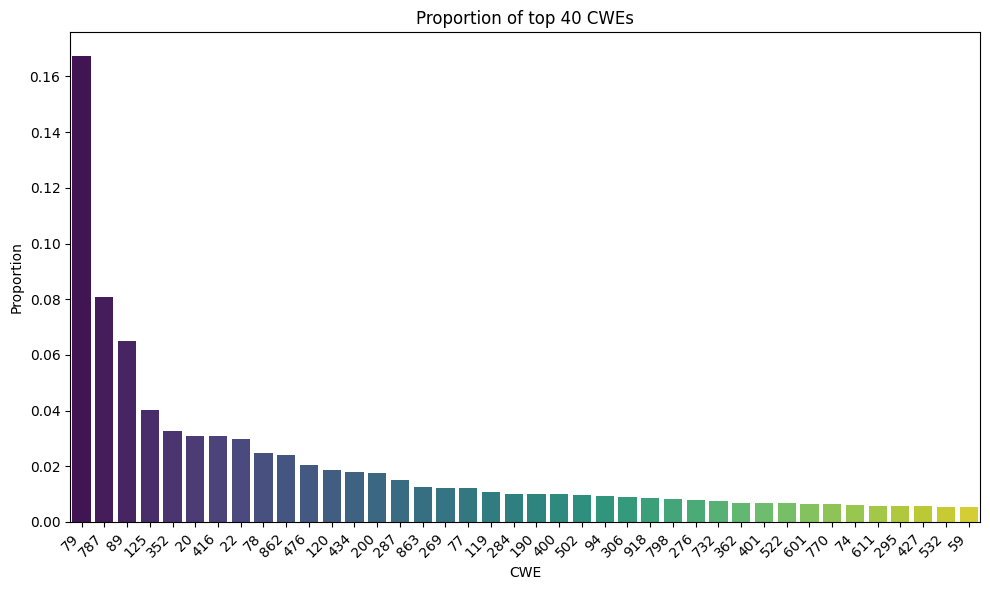

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

k = 40
data = (
    df[df["primary_cwe"].apply(lambda x: x != None)]["primary_cwe"]
    .value_counts(normalize=True)
)
data_df = data.reset_index()
data_df.columns = ["CWE", "Proportion"]
display(data_df.head(10))
print(len(data_df['CWE']))
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="CWE", y="Proportion", hue="CWE", data=data_df.head(k), palette="viridis")

# Add labels and title
plt.xticks(rotation=45, ha="right")
plt.title(f"Proportion of top {k} CWEs")

# Show the plot
plt.tight_layout()
plt.show()

108394
94
0.9494949494949495


,CWE,Proportion
0,79,18885
1,787,9096
2,89,7324
3,125,4547
4,352,3671
5,20,3494
6,416,3470
7,22,3363
8,78,2775
9,862,2714


99


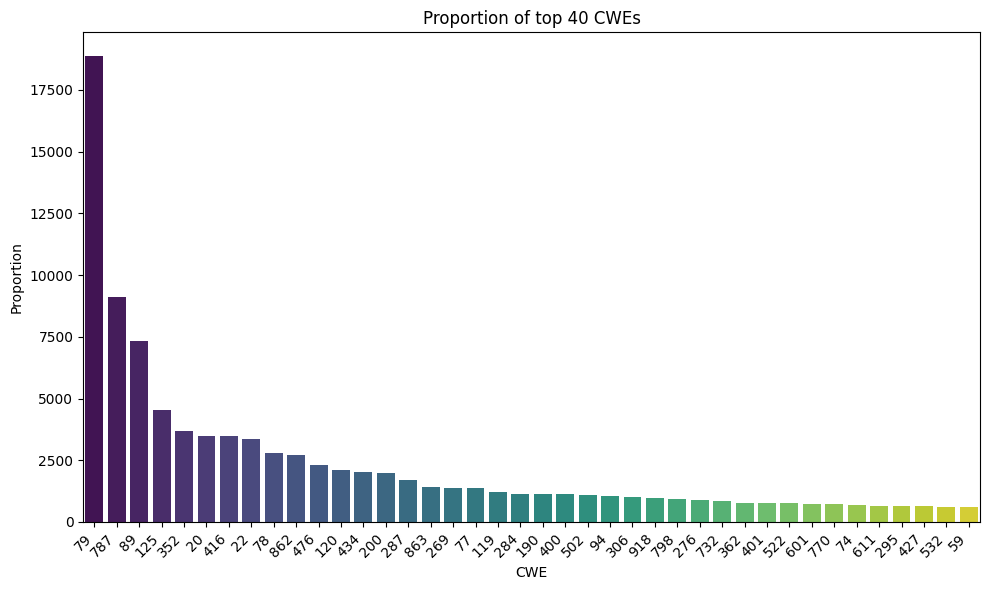

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

k = 40
data = (
    df[df["primary_cwe"].apply(lambda x: x != None)]["primary_cwe"]
    .value_counts(normalize=False)
)
data_df = data.reset_index()
data_df.columns = ["CWE", "Proportion"]
data_df = data_df[data_df['Proportion'] > 30]
print(sum(data_df['Proportion']))

len(data_df['CWE'].value_counts())
usage_dict_1003 = pd.Series(
    cwe_1003_df.MappingNotes_Usage.values, index=cwe_1003_df.ID
).to_dict()
in_1003 = len(data_df[data_df['CWE'].isin(usage_dict_1003)])
print(in_1003)
print(in_1003/len(data_df))

display(data_df.head(10))
print(len(data_df['CWE']))
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="CWE", y="Proportion", hue="CWE", data=data_df.head(k), palette="viridis")

# Add labels and title
plt.xticks(rotation=45, ha="right")
plt.title(f"Proportion of top {k} CWEs")

# Show the plot
plt.tight_layout()
plt.show()

,Usage,Count
0,Allowed,405
1,Allowed-with-Review,65
2,Discouraged,38


508


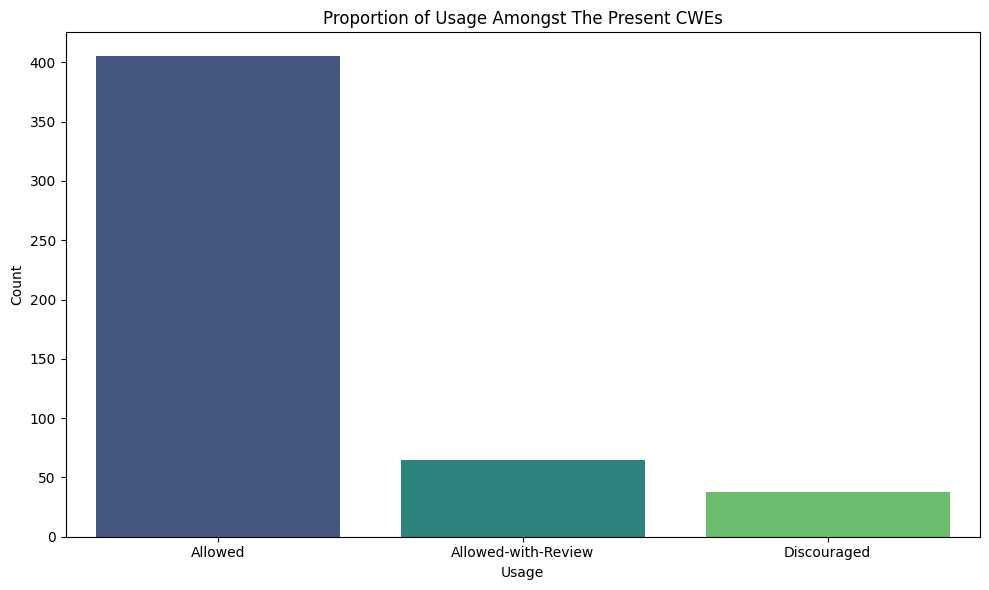

In [ ]:
cwes = df[df["primary_cwe"].apply(lambda x: x != None)]["primary_cwe"].value_counts()
df_plot = cwe_1000_df[cwe_1000_df["ID"].isin(cwes.index)]
data = df_plot["MappingNotes_Usage"].value_counts(normalize=False)

data_df = data.reset_index()
data_df.columns = ["Usage", "Count"]
display(data_df)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Usage", y="Count", hue="Usage", data=data_df, palette="viridis")

# Add labels and title
plt.title("Proportion of Usage Amongst The Present CWEs")

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

usage_dict = pd.Series(
    cwe_1000_df.MappingNotes_Usage.values, index=cwe_1000_df.ID
).to_dict()
usage = df[df["primary_cwe"].notna()][["primary_cwe"]]
usage["Usage"] = usage["primary_cwe"].map(lambda x: usage_dict[x])
display(usage.head())

,primary_cwe,Usage
0,89,Allowed
1,20,Discouraged
2,476,Allowed
3,770,Allowed
4,532,Allowed


,Usage,Proportion
0,Allowed,0.735649
1,Discouraged,0.139058
2,Allowed-with-Review,0.125294


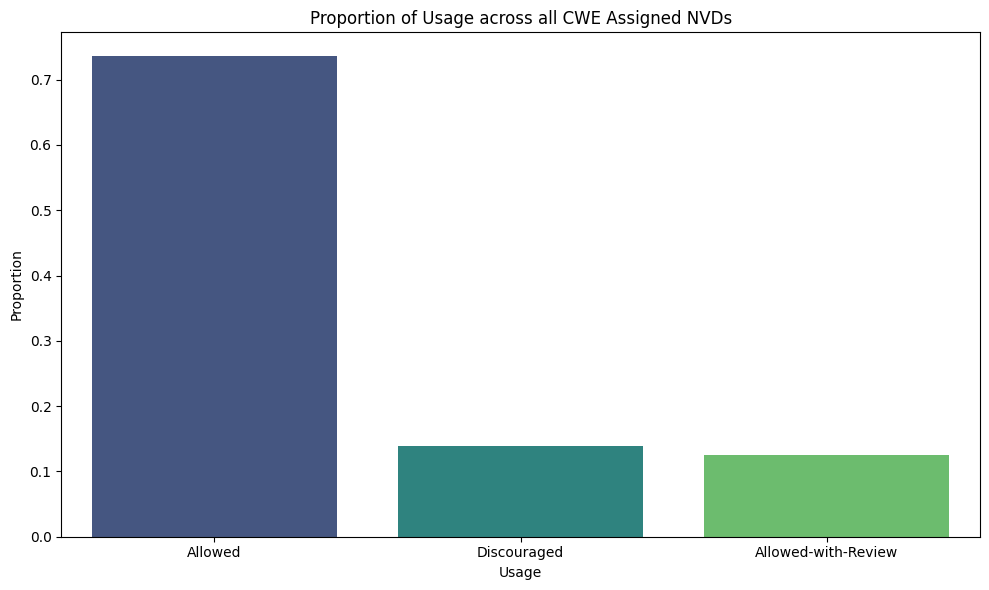

In [18]:
data = usage["Usage"].value_counts(normalize=True)

data_df = data.reset_index()
data_df.columns = ["Usage", "Proportion"]
display(data_df)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Usage", y="Proportion", hue="Usage", data=data_df, palette="viridis")

# Add labels and title
plt.title("Proportion of Usage across all CWE Assigned NVDs")

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
display(df.head())

,id,published,descriptions,metrics,weaknesses,references,configurations,cwe_list,primary_cwe
0,CVE-2019-3494,2019-01-01T15:29:00.240,Simply-Blog through 2019-01-01 has SQL Injecti...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Exploit...",[{'nodes': [{'cpeMatch': array([{'criteria': '...,[89],89
1,CVE-2018-20650,2019-01-01T16:29:00.233,A reachable Object::dictLookup assertion in Po...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Third P...",[{'nodes': [{'cpeMatch': array([{'criteria': '...,[20],20
2,CVE-2018-20651,2019-01-01T16:29:00.343,A NULL pointer dereference was discovered in e...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': None, 'ur...",[{'nodes': [{'cpeMatch': array([{'criteria': '...,[476],476
3,CVE-2018-20652,2019-01-01T16:29:00.403,An attempted excessive memory allocation was d...,"{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Exploit...",[{'nodes': [{'cpeMatch': array([{'criteria': '...,[770],770
4,CVE-2019-3500,2019-01-02T07:29:00.197,"aria2c in aria2 1.33.1, when --log is used, ca...","{'cvssMetricV2': [{'acInsufInfo': False, 'base...","[{'description': [{'lang': 'en', 'value': 'CWE...","[{'source': 'cve@mitre.org', 'tags': ['Patch',...",[{'nodes': [{'cpeMatch': array([{'criteria': '...,[532],532


In [21]:
usage_dict_1003 = pd.Series(
    cwe_1003_df.MappingNotes_Usage.values, index=cwe_1003_df.ID
).to_dict()
print(len(df[df['primary_cwe'].isin(usage_dict_1003)])/len(df))

0.9360062483728195


In [132]:
import pandas as pd
from datasets import Dataset

ds = Dataset.from_pandas(df)
ds.push_to_hub("Eathus/filtered-vulnerabilities")

Uploading the dataset shards: 100%|██████████| 1/1 [00:06<00:00,  6.68s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/Eathus/filtered-vulnerabilities/commit/e02b40545c72c9e2f9d6063156a116664ed2c42f', commit_message='Upload dataset', commit_description='', oid='e02b40545c72c9e2f9d6063156a116664ed2c42f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Eathus/filtered-vulnerabilities', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Eathus/filtered-vulnerabilities'), pr_revision=None, pr_num=None)

# References pipeline

In [53]:
references_df = vulnerabilities_df[["id", "published", "references"]]

In [54]:
test_df = references_df.explode("references")
test_df["tags"] = test_df["references"].map(
    lambda x: x["tags"] if "tags" in x.keys() else None
)
test_df["url"] = test_df["references"].map(lambda x: x["url"])
references_df = test_df[["id", "published", "url", "tags"]].reset_index(drop=True)
references_df.head()

,id,published,url,tags
0,CVE-2019-3494,2019-01-01T15:29:00.240,https://github.com/Paroxyste/Simply-Blog/issues/1,"[Exploit, Issue Tracking, Third Party Advisory]"
1,CVE-2019-3494,2019-01-01T15:29:00.240,https://github.com/Paroxyste/Simply-Blog/issues/1,"[Exploit, Issue Tracking, Third Party Advisory]"
2,CVE-2018-20650,2019-01-01T16:29:00.233,http://www.securityfocus.com/bid/106459,"[Third Party Advisory, VDB Entry]"
3,CVE-2018-20650,2019-01-01T16:29:00.233,https://access.redhat.com/errata/RHSA-2019:2022,[Third Party Advisory]
4,CVE-2018-20650,2019-01-01T16:29:00.233,https://access.redhat.com/errata/RHSA-2019:2713,[Third Party Advisory]


In [55]:
references_df = references_df.drop_duplicates(subset="url")

In [56]:
references_df.tags.dropna().map(list).explode().value_counts()

tags
Third Party Advisory      98331
Patch                     48221
Vendor Advisory           43907
Exploit                   39296
VDB Entry                 16440
Issue Tracking            13463
Permissions Required       9403
Mailing List               8988
Release Notes              6229
Product                    6018
Broken Link                3319
Mitigation                 1823
US Government Resource     1061
Technical Description       715
Not Applicable              662
Press/Media Coverage        114
URL Repurposed               97
Tool Signature               25
Related                      15
Name: count, dtype: int64

In [57]:
from urllib.parse import urlparse

references_df["domain"] = references_df["url"].map(lambda x: urlparse(x).netloc)
references_df.domain.value_counts().head(15)

domain
github.com                      43053
git.kernel.org                  14716
vuldb.com                       12120
lists.fedoraproject.org          4758
plugins.trac.wordpress.org       4624
patchstack.com                   4093
lists.apache.org                 3793
www.wordfence.com                3619
packetstormsecurity.com          3458
msrc.microsoft.com               3341
portal.msrc.microsoft.com        3295
www.zerodayinitiative.com        3264
wpscan.com                       3231
exchange.xforce.ibmcloud.com     3108
www.openwall.com                 2726
Name: count, dtype: int64

In [138]:
from datasets import Dataset

df = pd.DataFrame(references_df)

ds = Dataset.from_pandas(df)
ds.push_to_hub("Eathus/cve-references-list")

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/datasets/Eathus/cve-references-list/commit/cb7454443a794f1095ae4006e75dc6e18df97beb', commit_message='Upload dataset', commit_description='', oid='cb7454443a794f1095ae4006e75dc6e18df97beb', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Eathus/cve-references-list', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Eathus/cve-references-list'), pr_revision=None, pr_num=None)